### This demo shows how to detect faces from video and displays result in realtime

You need OpenCV installed to run this example. To install it, run ___pip install opencv-python___


In [2]:
%pylab inline 
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image, ImageDraw

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
path = os.getcwd()

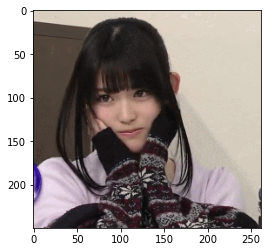

In [47]:
# Loading video for face detection
video_capture = cv2.VideoCapture(path+"/data/girl.gif")

frame_count = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()
    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


    # Find all the faces and face encodings in the current frame of video
    rgb_frame = frame[:, :, ::-1]
    face_locations = face_recognition.face_locations(rgb_frame)

    # If faces were found, we will mark it on frame with blue dots
    for face_location in face_locations:
        top, right, bottom, left = face_location
        cv2.rectangle(frame,(left, top), (right, bottom), (0, 0, 255), 2)
    plt.imshow(frame)
    plt.savefig(path+f"/data/frames/{frame_count}.png")
    # Show frame...
    plt.show() 
    # ... and hold it until a new frame appears
    clear_output(wait=True)

In [48]:
import imageio
images = []
filenames = list(range(1,40))
for i in filenames:
    try:
        images.append(imageio.imread(path+f"/data/frames/{i}.png"))
    except:
        pass
imageio.mimsave(path+f"/data/girls_face_detected.gif", images)